In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from dateutil.relativedelta import relativedelta
import os
import itertools as it
import _pickle as cPickle
import gc
import sys
from statistics import mode

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

old_err_state = np.seterr(divide='raise')
ignored_states = np.seterr(**old_err_state)

### Load Datasets: 
- News Count Data
- 1/N, 1/T Data

In [21]:
def load_cpickle_gc(filename):
    file_Name = filename
    output = open(file_Name, 'rb')

    gc.disable()

    mydict = cPickle.load(output)

    gc.enable()
    output.close()
    return mydict

In [22]:
_lambda_ = load_cpickle_gc('/Users/yiliwang/Documents/Berkeley MFE/AFP/lambda estimation/TWTR_2016-12-30_LAMBDAS')

In [23]:
NEWS = load_cpickle_gc('/Users/yiliwang/Documents/Berkeley MFE/AFP/lambda estimation/news dic/news_data')

In [65]:
NEWS['BAC'].head()

_time_      10:30:00  10:35:00  10:40:00  10:45:00  10:50:00  10:55:00  \
2016-01-05       1.0       1.0       0.0       1.0       0.0       0.0   
2016-01-06       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-07       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-08       1.0       0.0       0.0       1.0       1.0       1.0   
2016-01-09       1.0       0.0       0.0       0.0       1.0       1.0   

_time_      11:00:00  11:05:00  11:10:00  11:15:00  11:20:00  11:25:00  \
2016-01-05       1.0       1.0       0.0       1.0       1.0       0.0   
2016-01-06       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-07       1.0       1.0       0.0       1.0       1.0       1.0   
2016-01-08       1.0       0.0       1.0       1.0       1.0       1.0   
2016-01-09       0.0       0.0       1.0       1.0       1.0       1.0   

_time_      11:30:00  11:35:00  11:40:00  11:45:00  11:50:00  11:55:00  \
2016-01-05       1.0       1.0       1.0       0.0       1.0       1.0   
2016-01-06       1.0       1.0       1.0       0.0       1.0       1.0   
2016-01-07       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-08       1.0       1.0       1.0       1.0       0.0       1.0   
2016-01-09       0.0       0.0       0.0       0.0       0.0       0.0   

_time_      12:00:00  12:05:00  12:10:00  12:15:00  12:20:00  12:25:00  \
2016-01-05       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-06       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-07       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-08       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-09       0.0       0.0       0.0       0.0       0.0       1.0   

_time_      12:30:00  12:35:00  12:40:00  12:45:00  12:50:00  12:55:00  \
2016-01-05       0.0       1.0       1.0       1.0       0.0       1.0   
2016-01-06       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-07       1.0       1.0       1.0       0.0       1.0       1.0   
2016-01-08       1.0       1.0       1.0       0.0       1.0       1.0   
2016-01-09       0.0       0.0       0.0       0.0       1.0       0.0   

_time_      13:00:00  13:05:00  13:10:00  13:15:00  13:20:00  13:25:00  \
2016-01-05       1.0       1.0       0.0       0.0       0.0       0.0   
2016-01-06       0.0       1.0       1.0       1.0       0.0       1.0   
2016-01-07       0.0       0.0       0.0       1.0       1.0       1.0   
2016-01-08       0.0       1.0       1.0       1.0       1.0       1.0   
2016-01-09       0.0       0.0       0.0       1.0       1.0       0.0   

_time_      13:30:00  13:35:00  13:40:00  13:45:00  13:50:00  13:55:00  \
2016-01-05       1.0       1.0       0.0       1.0       1.0       1.0   
2016-01-06       1.0       1.0       1.0       0.0       0.0       1.0   
2016-01-07       1.0       1.0       0.0       1.0       1.0       1.0   
2016-01-08       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-09       0.0       1.0       0.0       1.0       1.0       0.0   

_time_      14:00:00  14:05:00  14:10:00  14:15:00  14:20:00  14:25:00  \
2016-01-05       0.0       1.0       0.0       1.0       0.0       0.0   
2016-01-06       1.0       0.0       1.0       1.0       1.0       1.0   
2016-01-07       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-08       1.0       1.0       1.0       1.0       1.0       0.0   
2016-01-09       0.0       0.0       0.0       0.0       0.0       1.0   

_time_      14:30:00  14:35:00  14:40:00  14:45:00  14:50:00  14:55:00  \
2016-01-05       1.0       1.0       0.0       0.0       0.0       1.0   
2016-01-06       1.0       1.0       0.0       0.0       0.0       0.0   
2016-01-07       1.0       0.0       1.0       1.0       0.0       0.0   
2016-01-08       1.0       1.0       1.0       1.0       1.0       1.0   
2016-01-09       1.0       0.0       1.0       0.0       0.0       0.0

### Process News: Convert to binary values, given a threshold 

In [62]:
def binary_news(df, threshold=1, flip = False):
    """
    convert news count dataframe into dataframe with binary values indicating news intensity, given a threshold
    
    flip == True to output no-news dataframe by flipping the binary dataframe 
    (i.e when entry value = 1 when there is no news)
    """
    df_after = df
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            df_after.iloc[i,j] = 1 if df.iloc[i,j]>=threshold else 0
    
    if flip == True:
        df_after = pd.DataFrame(np.logical_xor(df_after.values,1).astype(int),columns=df_after.columns, index=df_after.index)
    
    # reform the dataframe and column type
    df_after_ = df_after.T
    df_after_.columns = [str(i)[:10] for i in df_after_.columns]
    return df_after_

In [66]:
NEWS_binary_wiNews_df = binary_news(NEWS['BAC']) # not flipped
NEWS_binary_woNews_df = binary_news(NEWS['BAC'], flip = True) # flipped

In [67]:
NEWS_binary_wiNews_df.head()

2016-01-05  2016-01-06  2016-01-07  2016-01-08  2016-01-09  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         1.0         0.0         0.0   
10:40:00         0.0         1.0         1.0         0.0         0.0   
10:45:00         1.0         1.0         1.0         1.0         0.0   
10:50:00         0.0         1.0         1.0         1.0         1.0   

          2016-01-10  2016-01-11  2016-01-12  2016-01-13  2016-01-14  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         1.0         0.0         1.0   
10:40:00         1.0         1.0         1.0         1.0         1.0   
10:45:00         0.0         1.0         1.0         1.0         1.0   
10:50:00         1.0         1.0         1.0         0.0         1.0   

          2016-01-15  2016-01-16  2016-01-17  2016-01-18  2016-01-19  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         0.0         0.0         0.0         1.0   
10:40:00         1.0         0.0         0.0         0.0         1.0   
10:45:00         1.0         1.0         0.0         0.0         1.0   
10:50:00         1.0         0.0         0.0         0.0         1.0   

          2016-01-20  2016-01-21  2016-01-22  2016-01-23  2016-01-24  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         1.0         0.0         0.0   
10:40:00         1.0         1.0         1.0         1.0         1.0   
10:45:00         1.0         1.0         1.0         1.0         0.0   
10:50:00         1.0         0.0         1.0         1.0         1.0   

          2016-01-25  2016-01-26  2016-01-27  2016-01-28  2016-01-29  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         1.0         1.0         1.0   
10:40:00         1.0         1.0         0.0         1.0         1.0   
10:45:00         1.0         1.0         1.0         1.0         1.0   
10:50:00         1.0         1.0         1.0         1.0         1.0   

          2016-01-30  2016-01-31  2016-02-01  2016-02-02  2016-02-03  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         0.0         0.0         1.0         1.0         1.0   
10:40:00         0.0         0.0         1.0         1.0         1.0   
10:45:00         0.0         0.0         1.0         1.0         1.0   
10:50:00         1.0         1.0         1.0         1.0         1.0   

          2016-02-04  2016-02-05  2016-02-06  2016-02-07  2016-02-08  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         0.0         0.0         1.0   
10:40:00         1.0         1.0         1.0         1.0         1.0   
10:45:00         1.0         0.0         1.0         0.0         1.0   
10:50:00         1.0         0.0         1.0         0.0         1.0   

          2016-02-09  2016-02-10  2016-02-11  2016-02-12  2016-02-13  \
_time_                                                                 
10:30:00         1.0         1.0         1.0         1.0         1.0   
10:35:00         1.0         1.0         1.0         1.0         0.0   
10:40:00         1.0         1.0         1.0         1.0         1.0   
10:45:00         0.0         1.0         1.0         1.0         1.0   
10:50:00         1.0         1.0         1.

In [68]:
NEWS_binary_woNews_df.head()

2016-01-05  2016-01-06  2016-01-07  2016-01-08  2016-01-09  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           0           1           1   
10:40:00           1           0           0           1           1   
10:45:00           0           0           0           0           1   
10:50:00           1           0           0           0           0   

          2016-01-10  2016-01-11  2016-01-12  2016-01-13  2016-01-14  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           0           1           0   
10:40:00           0           0           0           0           0   
10:45:00           1           0           0           0           0   
10:50:00           0           0           0           1           0   

          2016-01-15  2016-01-16  2016-01-17  2016-01-18  2016-01-19  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           1           1           1           0   
10:40:00           0           1           1           1           0   
10:45:00           0           0           1           1           0   
10:50:00           0           1           1           1           0   

          2016-01-20  2016-01-21  2016-01-22  2016-01-23  2016-01-24  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           0           1           1   
10:40:00           0           0           0           0           0   
10:45:00           0           0           0           0           1   
10:50:00           0           1           0           0           0   

          2016-01-25  2016-01-26  2016-01-27  2016-01-28  2016-01-29  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           0           0           0   
10:40:00           0           0           1           0           0   
10:45:00           0           0           0           0           0   
10:50:00           0           0           0           0           0   

          2016-01-30  2016-01-31  2016-02-01  2016-02-02  2016-02-03  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           1           1           0           0           0   
10:40:00           1           1           0           0           0   
10:45:00           1           1           0           0           0   
10:50:00           0           0           0           0           0   

          2016-02-04  2016-02-05  2016-02-06  2016-02-07  2016-02-08  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           1           1           0   
10:40:00           0           0           0           0           0   
10:45:00           0           1           0           1           0   
10:50:00           0           1           0           1           0   

          2016-02-09  2016-02-10  2016-02-11  2016-02-12  2016-02-13  \
_time_                                                                 
10:30:00           0           0           0           0           0   
10:35:00           0           0           0           0           1   
10:40:00           0           0           0           0           0   
10:45:00           1           0           0           0           0   
10:50:00           0           0           

### Calculating News Adjusted Lambdas: 

1. Reshape each volume dataframe to a large dimension
2. Mute the undesired time intervals (function ` _LambdaComponent_converter_`)
3. Sum up the 1/T dataframes given a time level: daily, weekly, monthly (function ` _LambdaComponent_converter_`)

__special note__: 2016-01-04 is missing in News data. Ignore it

In [30]:
def my_reshape(df, maxsize = 200):
    if df.shape == (0,0):
        return default
    return df.reindex(np.arange(maxsize)).fillna(0).T.reindex(np.arange(maxsize)).fillna(0).T

In [31]:
# set up default dataframe with max shape
maxsize = 200
default = pd.DataFrame(np.zeros((200,200)), index = np.arange(maxsize), columns = np.arange(maxsize))

In [32]:
def nb_choice(level):
    return ['T_{}_{}_p'.format(level[0],level[1]),'T_{}_{}_n'.format(level[0],level[1]),
            'N_{}_{}_p'.format(level[0],level[1]),'N_{}_{}_n'.format(level[0],level[1])]

In [33]:
def weekly_date_slicer(DATA):
    res = []
    for i in range(int(len(DATA.keys())/5)):
        res.append(list(DATA.keys())[5*i:i*5+5])
    return res

In [37]:
# new version w/ news factor
import datetime
def _LambdaComponent_converter_(DATA, news_df, convert_to = "daily"):
    # organize data to daily level
    data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in DATA.keys()}

    for date in DATA.keys():
        print("working on ", date)
        for time in DATA[date].keys():  
            time_str = str(datetime.timedelta(seconds=int(time)))
            for level in ['B1','B2','A1','A2']:
                for nb in nb_choice(level):
                    try:
                        if news_df[date][time_str] == 1:
                            data[date][level][nb] = data[date][level][nb] + \
                                        my_reshape(DATA[date][time][level][nb])
                    except:
                        print("Missing date: ", date)
                        #sys.exit()
    if convert_to == "daily":
        return data
    week_dates = weekly_date_slicer(data)
    if convert_to == "weekly":
        start_week = [week_dates[i][0] for i in range(len(week_dates))]
        data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in start_week}
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(len(week_dates)):
                    data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
                    data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
        return data_weekly
    if convert_to == 'monthly':
        dates = pd.to_datetime(list(data.keys())).to_frame()
        dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
        dic_by_month={k.month: v for k, v in dic_by_month.items()}

        data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in dic_by_month.keys()}

        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(1, 12):
                    for j in range(len(dic_by_month[i])):
                        data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
        return data_monthly

In [38]:
# Caution: 2016-01-04 is missing from News dataframe and it's okay
LambdaComponent_weekly = _LambdaComponent_converter_(_lambda_['TWTR'],NEWS_binary_df, convert_to = "weekly")

working on  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  

Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date:  2016-01-04
Missing date

working on  2016-12-13
working on  2016-12-14
working on  2016-12-15
working on  2016-12-16
working on  2016-12-19
working on  2016-12-20
working on  2016-12-21
working on  2016-12-22
working on  2016-12-23
working on  2016-12-27
working on  2016-12-28
working on  2016-12-29
working on  2016-12-30


In [46]:
# glimpse of output
LambdaComponent_weekly['2016-01-04']['B1']['N_B_1_p']

0     1     2     3      4      5      6      7     8     9     10   \
0      1.0   1.0   0.0   9.0   59.0   71.0   87.0   63.0  55.0  34.0  18.0   
1      2.0   1.0   4.0  10.0   95.0   78.0   97.0   83.0  65.0  32.0   8.0   
2     10.0   7.0   7.0  34.0   93.0   86.0  117.0   69.0  76.0  41.0  14.0   
3     35.0  22.0  46.0  66.0  177.0  131.0  150.0  106.0  92.0  37.0  28.0   
4     81.0  30.0  50.0  85.0  112.0   91.0   93.0   59.0  45.0  24.0  27.0   
5    151.0  48.0  55.0  74.0  114.0  103.0   87.0   46.0  39.0  23.0  14.0   
6    170.0  20.0  41.0  47.0   57.0   49.0   64.0   34.0  46.0  20.0  14.0   
7    162.0  30.0  33.0  46.0   68.0   56.0   60.0   27.0  30.0  15.0   8.0   
8    165.0  11.0  36.0  32.0   38.0   31.0   23.0   22.0  22.0  14.0   7.0   
9    185.0  18.0  27.0  30.0   48.0   41.0   39.0   28.0  26.0  13.0   9.0   
10   142.0   9.0  12.0  16.0   20.0   18.0   34.0   21.0  15.0  10.0  11.0   
11   192.0  15.0  15.0  27.0   25.0   33.0   31.0   18.0  26.0  16.0   2.0   
12   161.0  15.0  19.0  16.0   13.0   28.0   21.0   15.0  14.0  11.0   5.0   
13   138.0  12.0  11.0  10.0   15.0   12.0   13.0   17.0  11.0   3.0   3.0   
14   126.0   7.0   9.0   6.0    7.0    9.0    9.0   16.0   9.0   6.0   2.0   
15   109.0   1.0   3.0   6.0    7.0    4.0    9.0    9.0  11.0   2.0   3.0   
16   101.0   1.0   2.0   2.0    6.0    3.0    4.0    6.0   2.0   6.0   5.0   
17    66.0   0.0  12.0   7.0    5.0    0.0    5.0    5.0   9.0   8.0   2.0   
18    61.0   0.0   3.0  10.0    3.0    3.0    4.0    4.0   5.0   0.0   0.0   
19    50.0   1.0   4.0   4.0    1.0    1.0    2.0    3.0   2.0   0.0   2.0   
20    44.0   2.0   7.0   1.0    2.0    2.0    2.0    1.0   1.0   0.0   3.0   
21    29.0   2.0   4.0   1.0    2.0    2.0    1.0    5.0   0.0   0.0   0.0   
22    39.0   0.0   2.0   0.0    1.0    1.0    0.0    4.0   1.0   2.0   0.0   
23    47.0   0.0   1.0   1.0    1.0    1.0    1.0    3.0   1.0   0.0   0.0   
24    38.0   0.0   0.0   1.0    0.0    0.0    1.0    0.0   0.0   0.0   0.0   
25    26.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
26    18.0   1.0   1.0   0.0    0.0    0.0    0.0    0.0   1.0   0.0   0.0   
27    20.0   1.0   7.0   0.0    0.0    0.0    0.0    2.0   0.0   0.0   0.0   
28    12.0   1.0   0.0   0.0    0.0    0.0    2.0    0.0   0.0   0.0   0.0   
29    12.0   2.0   0.0   0.0    2.0    0.0    1.0    0.0   0.0   0.0   0.0   
30     4.0   1.0   0.0   0.0    2.0    0.0    0.0    0.0   0.0   0.0   0.0   
31    19.0   0.0   0.0   2.0    4.0    0.0    1.0    0.0   0.0   0.0   0.0   
32     9.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   0.0   0.0   1.0   
33     7.0   0.0   0.0   0.0    0.0    0.0    1.0    0.0   0.0   0.0   0.0   
34     2.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
35     3.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
36     3.0   0.0   0.0   1.0    1.0    0.0    0.0    0.0   0.0   0.0   0.0   
37     3.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
38     5.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
39     1.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
40     6.0   0.0   0.0   0.0    1.0    0.0    0.0    0.0   0.0   0.0   0.0   
41     2.0   0.0   0.0   1.0    1.0    0.0    0.0    0.0   0.0   0.0   0.0   
42     0.0   0.0   1.0   0.0    2.0    1.0    1.0    0.0   0.0   0.0   0.0   
43     1.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
44     2.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
45     2.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
46     1.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
47     0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
48     0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
49     0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   
..     ...   ...   ...   ... 

In [517]:
""" original
def _oneOverT_converter_(DATA, convert_to = "daily"):
    # organize data to daily level
    data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in DATA.keys()}

    for date in DATA.keys():
        print("working on ", date)
        for time in DATA[date].keys():  
            for level in ['B1','B2','A1','A2']:
                for nb in nb_choice(level):
                    try:
                        data[date][level][nb] = data[date][level][nb] + \
                                    my_reshape(DATA[date][time][level][nb])
                    except:
                        print("']['".join([date, time, level, nb]))
                        sys.exit()
    if convert_to == "daily":
        return data
    week_dates = weekly_date_slicer(data)
    if convert_to == "weekly":
        start_week = [week_dates[i][0] for i in range(len(week_dates))]
        data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in start_week}
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(len(week_dates)):
                    data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
                    data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
        return data_weekly
    if convert_to == 'monthly':
        dates = pd.to_datetime(list(data.keys())).to_frame()
        dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
        dic_by_month={k.month: v for k, v in dic_by_month.items()}

        data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
                 for d in dic_by_month.keys()}

        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                for i in range(1, 12):
                    for j in range(len(dic_by_month[i])):
                        data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
        return data_monthly
        """

### Cropping Lambda Component Matrix 

1. Crop the lambda component dataframes to the shapes that contain 80% numbers of trading transactions (based on N matrix, function `crop_dimension_helper`)
2. Crop T and N matrices given found shapes, with last boundary entries of cropped matrices containing summation of cropped values (function `cropper`)

In [519]:
"""
N_matrix = OneOverT_weekly['2016-01-04']['A2']['N_A_2_p']

col_num = N_matrix.shape[1]
for i in range(col_num-1):
    percentile = N_matrix.sum().sum()*0.8
    if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:
        print(i)
        """

"\nN_matrix = OneOverT_weekly['2016-01-04']['A2']['N_A_2_p']\n\ncol_num = N_matrix.shape[1]\nfor i in range(col_num-1):\n    percentile = N_matrix.sum().sum()*0.8\n    if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:\n        print(i)\n        "

In [520]:
LambdaComponent_weekly['2016-01-04']['B2']['T_B_2_p'].shape

(200, 200)

In [47]:
def crop_dimension_helper(N_matrix):
    """
    return crop index for single N matrix with 80% transaction numbers contained
    """
    row_num, col_num = N_matrix.shape[0], N_matrix.shape[1]
    percentile = N_matrix.sum().sum()*0.8
    for i in range(col_num-1):
        if N_matrix.sum(axis = 0)[:i].sum()<=percentile and N_matrix.sum(axis = 0)[:i+1].sum()>=percentile:
            col_crop = i
    for i in range(row_num-1):
        if N_matrix.sum(axis = 1)[:i].sum()<=percentile and N_matrix.sum(axis = 1)[:i+1].sum()>=percentile:
            row_crop = i
    return col_crop, row_crop

In [48]:
def crop_dimension_finder(weekly_oneOverT):
    """
    Find the median of crop index for row and column
    """
    col_crop, row_crop = [],[]
    for date in weekly_oneOverT.keys():
        for level in ['B1','B2','A1','A2']:
            positive_label = 'N_{}_{}_p'.format(level[0],level[1])
            negative_label = 'N_{}_{}_n'.format(level[0],level[1])
            positive_col, positive_row = crop_dimension_helper(weekly_oneOverT[date][level][positive_label])
            negative_col, negative_row = crop_dimension_helper(weekly_oneOverT[date][level][negative_label])
            col_crop.append(positive_col)
            col_crop.append(negative_col)
            row_crop.append(positive_row)
            row_crop.append(negative_row)
    print("The optimal index [crop_col, crop_row] to crop N matrix is: ", [int(np.median(col_crop)), int(np.median(row_crop))])
    return int(np.median(col_crop)), int(np.median(row_crop))

In [50]:
"""
#N_matrix.iloc[15, :]
row_crop = 15
col_crop = 8
N_matrix.iloc[row_crop:, col_crop] = N_matrix.iloc[row_crop:, :].sum(axis = 1)
N_matrix.iloc[row_crop, col_crop:] = N_matrix.iloc[:, col_crop:].sum(axis = 0)
N_matrix.iloc[:row_crop+1, :col_crop+1]
"""

'\n#N_matrix.iloc[15, :]\nrow_crop = 15\ncol_crop = 8\nN_matrix.iloc[row_crop:, col_crop] = N_matrix.iloc[row_crop:, :].sum(axis = 1)\nN_matrix.iloc[row_crop, col_crop:] = N_matrix.iloc[:, col_crop:].sum(axis = 0)\nN_matrix.iloc[:row_crop+1, :col_crop+1]\n'

In [51]:
def cropper(weekly_oneOverT):
    """
    Returns the cropped T and N matrices, with last entry contains summation of cropped values
    """
    cropped = weekly_oneOverT
    col_crop, row_crop = crop_dimension_finder(weekly_oneOverT)
    for date in cropped.keys():
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                # sum the cropped values
                try:
                    cropped[date][level][nb].iloc[row_crop:, col_crop] = cropped[date][level][nb].iloc[row_crop:, :].sum(axis = 1)
                    cropped[date][level][nb].iloc[row_crop, col_crop:] = cropped[date][level][nb].iloc[:, col_crop:].sum(axis = 0)
                    cropped[date][level][nb] =cropped[date][level][nb].iloc[:row_crop+1, :col_crop+1]
                except:
                    print([date, level, nb])
    return cropped

In [54]:
LambdaComponent_weekly_shaped = cropper(LambdaComponent_weekly)

The optimal index [crop_col, crop_row] to crop N matrix is:  [9, 15]


### Calculate Lambda: 
Given the computed lambda components

In [55]:
def _lambda_calculator_(DIC):
    res_dic = {d: {l: {nb: default for nb in ['lambda_positive','lambda_negative']} for l in ['B1','B2','A1','A2']}\
         for d in DIC.keys()}
    
    #col_crop, row_crop = crop_dimension_finder(DIC)
    
    for date in list(DIC.keys()):
        for level in ['B1','B2','A1','A2']:
            T_P_label = 'T_'+level[0]+'_'+level[1]+'_p'
            N_P_label = 'N_'+level[0]+'_'+level[1]+'_p'
            T_N_label = 'T_'+level[0]+'_'+level[1]+'_n'
            N_N_label = 'N_'+level[0]+'_'+level[1]+'_n'
                        
            res_dic[date][level]['lambda_positive'] = (DIC[date][level][T_P_label]/DIC[date][level][N_P_label]).fillna(0)
            res_dic[date][level]['lambda_negative'] = (DIC[date][level][T_N_label]/DIC[date][level][N_N_label]).fillna(0)
    return res_dic

In [56]:
# test to generate weekly lambda
# lambda_weekly = _lambda_calculator_(OneOverT_weekly)
lambda_weekly = _lambda_calculator_(LambdaComponent_weekly_shaped)

In [61]:
# sample output
print("Actual Cropped Lambda Dimension: ", lambda_weekly['2016-01-11']['A1']['lambda_positive'].shape)
lambda_weekly['2016-01-11']['A1']['lambda_positive']

Actual Cropped Lambda Dimension:  (16, 10)


0              1              2              3              4  \
0     4978.421578    6891.402953   17045.111746   17810.259717   22285.669166   
1     5054.920614   12192.123895   43191.176762    8347.403931   15583.387969   
2    21547.498082   16144.755027   41201.897856   14437.158090   49808.750581   
3     4459.795553   18282.028399   18608.075044   33653.283616   28096.007374   
4     6780.011309   13103.789196   10507.330760   27707.969054   30794.027090   
5    16932.385995   47851.455515    8040.507210    9536.705381   32613.194599   
6    86030.850627   37172.099217   50769.609539   13490.587238   31552.130417   
7    76539.500736   42954.679047   49567.233051   29132.656939   21630.427255   
8    59450.212106   22384.932698   89153.062933   26493.014402   97565.021529   
9    51083.157699   12530.612707   36735.531234   42601.064741  122893.877846   
10   55694.627552  111219.738240   97315.453477   49575.813496  125620.049713   
11   99948.313389  115411.708783   42831.431514   39795.637264   72265.768623   
12  108981.095966  133661.713837  191525.892482  101452.154206   83874.656280   
13  222972.422799  181394.191054  253876.089861   79405.403271  125075.439333   
14   86071.850979    9063.380545  115734.696160   51510.848325  304753.805822   
15  257745.862902   67591.257415   20751.768208  192478.072008  429681.770089   

                5              6              7              8              9  
0    13524.418948   22996.440879   25376.010031   13858.826314    8627.520851  
1    25184.311953    6536.220893   37742.382889    7131.147966    6675.422834  
2    26061.270410   12445.598177   61396.343889   31318.495861   22236.953596  
3    26159.073220    8478.839317   13826.342720   21724.844446   18479.746858  
4    38652.558886   16581.503567  100521.549999   13379.147832   49999.380668  
5    49999.306486   39483.727276   33539.763868   65272.456116    7975.261253  
6    13318.506612   58498.672212   11617.804092   15869.701533   31488.256498  
7    50716.412929   47477.093265   34970.492295   22116.100585   80898.007581  
8    80592.358807  236327.417435   56923.833307  154271.481119   15562.523723  
9    20572.841896   68434.981359   18324.703251    3197.090583  119662.975912  
10  229931.356379   22021.518610   29793.997482     260.384931   26092.133226  
11   31139.082361   32238.445162    3435.026256    2300.639807   14630.949535  
12   96248.454869    5531.880771    8868.525426   27501.797829  261808.276427  
13   54771.541818   37400.709483  112872.787337    7037.030816  137806.682338  
14   73858.661021    8810.412475   23076.757139    8816.392462   26445.322134  
15   75727.664544  129134.189349   14354.027356   22392.335518  152243.147692

In [299]:
# save output 
import pickle

def dump_pickle(file, filename):
    file_Name = filename
    fileObject = open(file_Name, 'wb')
    cPickle.dump(file, fileObject)
    fileObject.close()

In [300]:
dump_pickle(lambda_weekly, "lambda_weekly")

In [154]:
"""
week_dates = weekly_date_slicer(data)
start_week = [week_dates[i][0] for i in range(len(week_dates))]
data_weekly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in start_week}
for level in ['B1','B2','A1','A2']:
    for nb in nb_choice(level):
        for i in range(len(week_dates)):
            data_weekly[week_dates[i][0]][level][nb] = data[week_dates[i][0]][level][nb]+data[week_dates[i][1]][level][nb]+data[week_dates[i][2]][level][nb]+\
            data[week_dates[i][3]][level][nb]+data[week_dates[i][4]][level][nb]
            """

In [255]:
"""
dates = pd.to_datetime(list(data.keys())).to_frame()
dic_by_month = dates.groupby([pd.Grouper(freq = 'M')]).groups
dic_by_month={k.month: v for k, v in dic_by_month.items()}

data_monthly = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
         for d in dic_by_month.keys()}

for level in ['B1','B2','A1','A2']:
    for nb in nb_choice(level):
        for i in range(1, 12):
            for j in range(len(dic_by_month[i])):
                data_monthly[i][level][nb] = data_monthly[i][level][nb]+ data[str(dic_by_month[i][j])[:10]][level][nb]
                """

In [305]:
"""
# organize data to daily level
data = {d: {l: {nb: default for nb in nb_choice(l)} for l in ['B1','B2','A1','A2']}\
     for d in _lambda_['TWTR'].keys()}

for date in _lambda_['TWTR'].keys():
    print("working on ", date)
    for time in _lambda_['TWTR'][date].keys():  
        for level in ['B1','B2','A1','A2']:
            for nb in nb_choice(level):
                try:
                    data[date][level][nb] = data[date][level][nb] + \
                                my_reshape(_lambda_['TWTR'][date][time][level][nb])
                except:
                    print("']['".join([date, time, level, nb]))
                    sys.exit()
                    """

'\n# organize data to daily level\ndata = {d: {l: {nb: default for nb in nb_choice(l)} for l in [\'B1\',\'B2\',\'A1\',\'A2\']}     for d in _lambda_[\'TWTR\'].keys()}\n\nfor date in _lambda_[\'TWTR\'].keys():\n    print("working on ", date)\n    for time in _lambda_[\'TWTR\'][date].keys():  \n        for level in [\'B1\',\'B2\',\'A1\',\'A2\']:\n            for nb in nb_choice(level):\n                try:\n                    data[date][level][nb] = data[date][level][nb] +                                 my_reshape(_lambda_[\'TWTR\'][date][time][level][nb])\n                except:\n                    print("\'][\'".join([date, time, level, nb]))\n                    sys.exit()\n                    '

In [72]:
lambda_weekly['2016-01-11']['B1']['lambda_positive']

0              1              2              3              4  \
0    27882.885049   77779.595763   70890.922121  111118.592080   87232.478042   
1    27208.876599  147862.952223  183140.090669  227197.686576  193169.831177   
2    47063.773669   60410.321367  110943.518356  174146.510617  168507.389978   
3    67828.548654   96842.034410  203799.519014  177302.376348  273588.177132   
4    80216.737786   86452.520740  266589.195965  260127.375674  433180.146384   
5   106743.534346   88212.718246  140273.677476  246761.012980  460039.345603   
6   136482.864713   86753.039076  214923.530164  289615.875336  542189.611741   
7   193916.552009  123883.388576  291606.400738  357469.318817  509949.264854   
8   217484.799658  206730.116414  422878.605385  296598.687852  471117.777347   
9   226039.101914   50989.768699  329588.440802  462777.697022  349826.852301   
10  237023.622581  141348.883071  194653.536133  511391.455355  252188.691400   
11  226020.918865   95454.180823  227542.650038  581246.997032  457279.047307   
12  191855.318251   55023.919941  398923.344704  516877.553813  257754.094531   
13  184662.555871  215017.949490   35937.912471  407187.277910  306290.357949   
14  274400.836433   11989.801528   93054.886814  549246.697784  364890.851257   
15  243895.857272   17643.616961  457764.117801   22592.061143  515017.098915   

                5              6             7             8              9  
0   103655.161442   99142.455607  1.180581e+05  6.532709e+04   69340.378315  
1   195904.900152  145794.736219  1.382945e+05  2.053162e+05  147482.633643  
2   181737.138319  161303.304144  2.135602e+05  1.853830e+05  327490.642595  
3   243738.408659  250883.947521  3.721599e+05  2.817002e+05  141834.107673  
4   272452.251180  344821.715411  5.386395e+05  2.955522e+05  314261.419883  
5   247178.055079  414303.865885  6.007578e+05  6.255386e+05  379357.197701  
6   262869.403131  612122.338548  1.150765e+06  5.508516e+05  456609.444117  
7   494465.589251  678013.594674  8.535931e+05  5.484805e+05  704997.540246  
8   454569.851350  643628.427872  6.077274e+05  6.799644e+05  478209.680760  
9   392848.753608  605325.346690  6.485955e+05  2.671502e+05  253430.378047  
10  191327.768130  531631.495685  5.281053e+05  5.370892e+05  515397.707197  
11  348151.760756  450359.792265  6.220967e+05  6.282115e+05  100926.868909  
12  660787.831851  321006.405107  4.083715e+05  7.004105e+05   68157.132684  
13  545113.898664  847166.029568  4.947296e+05  7.129389e+05  183134.370807  
14  509322.273199  419762.227924  1.799794e+05  1.265822e+06     105.353751  
15  455197.881702   51910.298997  4.716050e+05  8.141020e+05  263662.953977

### Stationarity of Lambda

In [166]:
lambda_weekly[list(lambda_weekly.keys())[6]]['B1']['lambda_positive']

0              1              2             3             4  \
0   178651.220162       5.153661   51588.309068  3.319379e+04  6.193030e+04   
1   602699.783270   10807.266418   72141.954711  7.888585e+04  1.713524e+05   
2    29697.301576   15549.273156  210157.015301  1.672665e+05  2.226513e+05   
3    30531.734980   33827.120998   64142.083478  1.685816e+05  2.663909e+05   
4    64316.332465   29563.241313   85856.336613  2.906781e+05  2.324031e+05   
5    64768.850903   34421.884268   15380.627598  1.783013e+05  1.470501e+05   
6   144990.315361   58168.641789   66027.990903  1.326712e+05  4.049987e+05   
7   135963.241131   83828.702098   61225.047080  2.707085e+05  5.129749e+05   
8   214775.407615   58271.669572  110374.848487  2.822919e+05  7.334168e+05   
9   249577.185322  151915.191736   86036.537041  1.796731e+05  9.875550e+05   
10  232398.420156   77759.407778   26027.022669  4.531496e+05  4.551657e+05   
11  263805.415951   71082.504800  124755.771416  3.654332e+05  8.873965e+05   
12  274577.010498   35500.690269  255334.502115  8.005267e+05  8.639067e+05   
13  251404.928983  111449.333320   45264.999454  1.258005e+06  1.095693e+06   
14  280745.070503  125334.291894   37170.675418  1.183620e+06  1.055716e+06   
15  245062.994128  647220.383563   37490.163685  9.018804e+05  1.084757e+06   

                5             6             7             8             9  
0    60440.841347  6.417788e+04  7.138518e+04  1.126719e+05  6.510972e+04  
1    83429.581460  1.434932e+05  1.256509e+05  9.331532e+04  1.301599e+05  
2   126394.993920  9.651061e+04  1.577425e+05  2.220427e+05  2.446943e+05  
3   134382.549887  3.399581e+05  2.429606e+05  1.989420e+05  4.941789e+05  
4   222573.073669  5.554290e+05  2.011036e+05  4.225090e+05  7.965745e+05  
5   434686.691511  5.843955e+05  2.910342e+05  1.055704e+06  7.725758e+05  
6   554586.861238  8.081894e+05  3.741088e+05  1.227455e+06  7.446196e+05  
7   867067.277295  9.983347e+05  5.719408e+05  7.875683e+05  1.028637e+06  
8   680925.788606  1.594390e+06  9.460343e+05  1.126204e+06  1.020094e+06  
9   246747.774087  1.345079e+06  7.351847e+05  1.266220e+06  1.284732e+06  
10  892066.030613  1.112691e+06  8.927605e+05  1.151130e+06  1.249516e+06  
11  839823.533938  9.694056e+05  9.820612e+05  8.898612e+05  1.545356e+06  
12  394606.594550  6.777314e+05  1.047726e+06  6.557438e+05  1.509916e+06  
13  638138.434755  9.871243e+05  6.857620e+05  8.218160e+05  1.430867e+06  
14  255635.793628  5.523930e+05  6.728853e+05  2.363431e+06  8.735942e+05  
15   48250.924206  1.031318e+06  2.671591e+05  9.657799e+05  4.887433e+05

In [183]:
# for a given level and given sign
def std_calc(level, sign, lambda_weekly_dic):
    _arr_1 = lambda_weekly_dic[list(lambda_weekly_dic.keys())[1]][level][sign].values.flatten() # initial arr (skipping the 2016-01-04)
    _arr_2 = lambda_weekly_dic[list(lambda_weekly_dic.keys())[2]][level][sign].values.flatten()
    _arr_ = [[a]+[b] for a,b in zip(_arr_1, _arr_2)]
    for date in list(lambda_weekly_dic.keys())[3:]:
        arr_new = lambda_weekly_dic[date][level][sign].values.flatten()
        _arr_ = [a+[b] for a,b in zip(_arr_, arr_new)]
    std = [np.std(arr) for arr in _arr_]
    return _arr_, std

In [212]:
level = 'A1'
sign = 'lambda_positive'

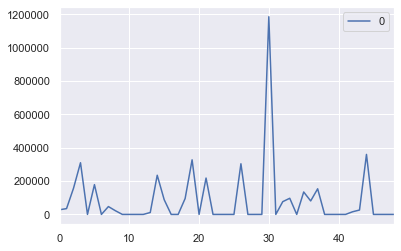

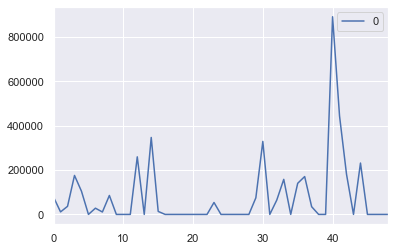

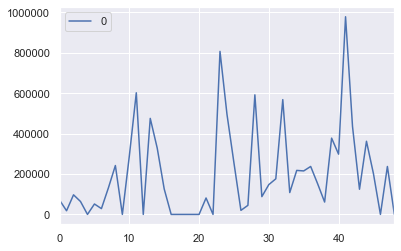

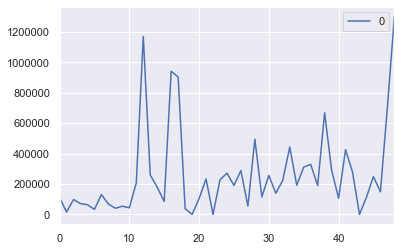

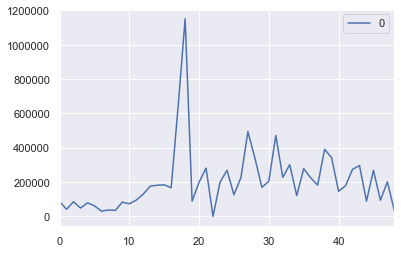

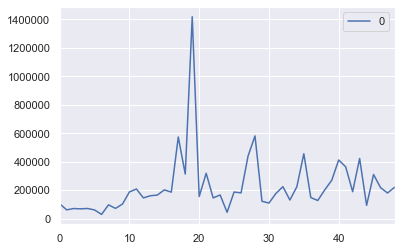

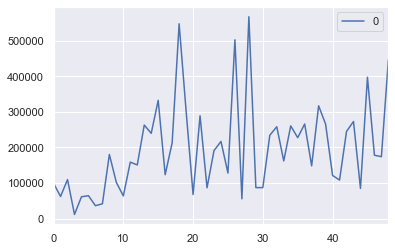

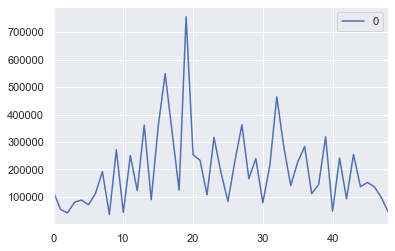

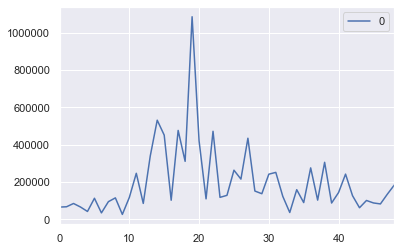

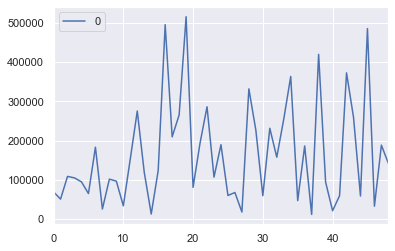

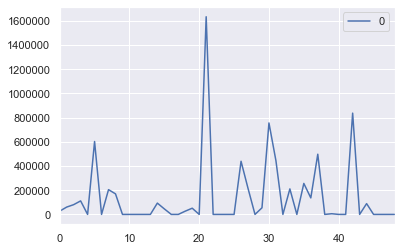

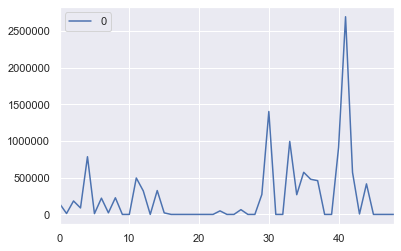

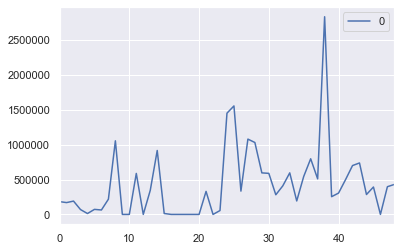

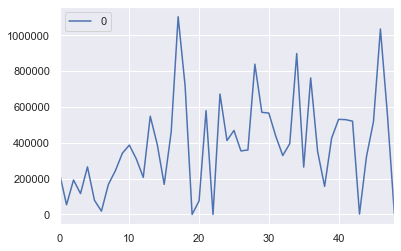

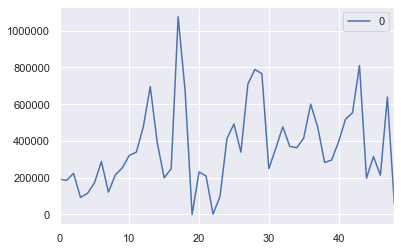

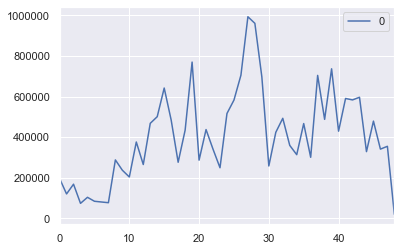

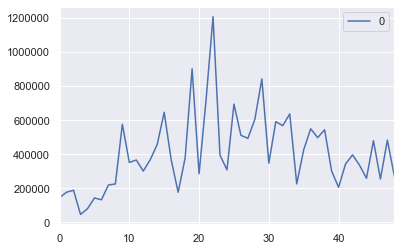

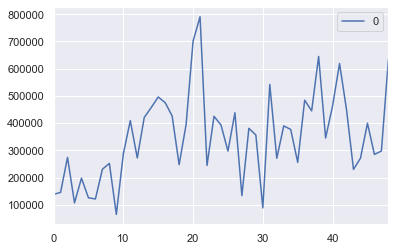

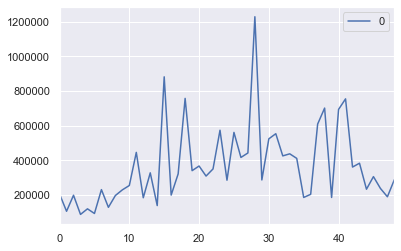

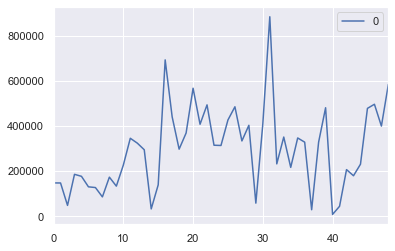

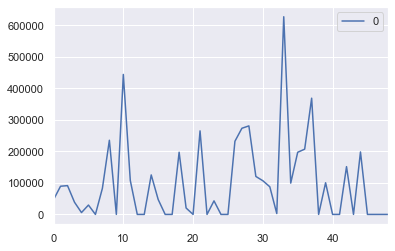

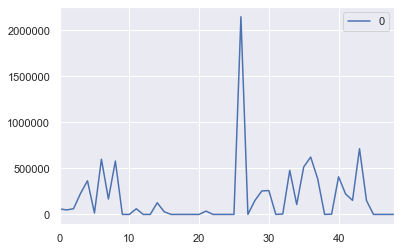

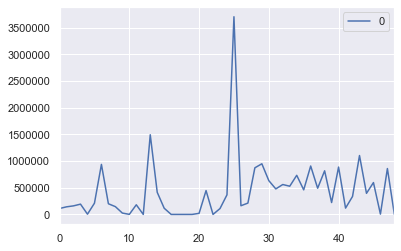

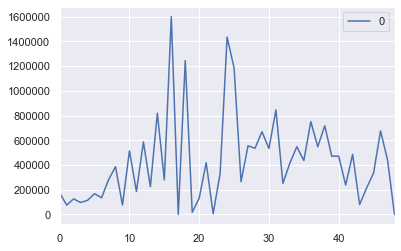

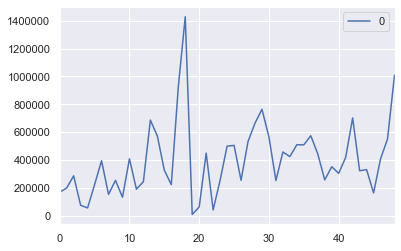

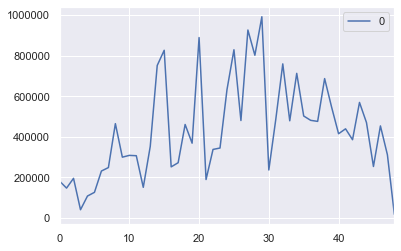

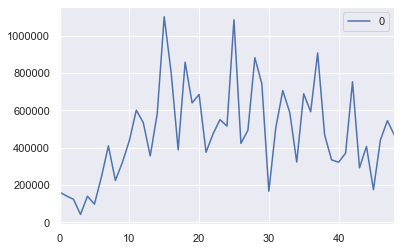

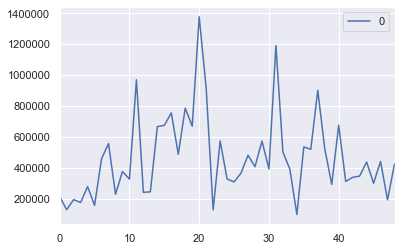

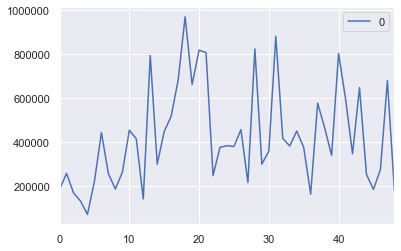

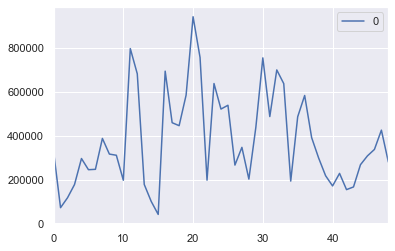

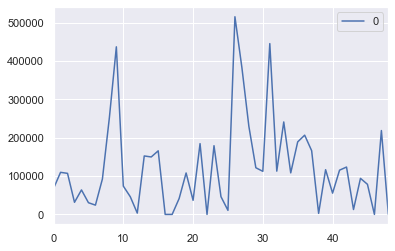

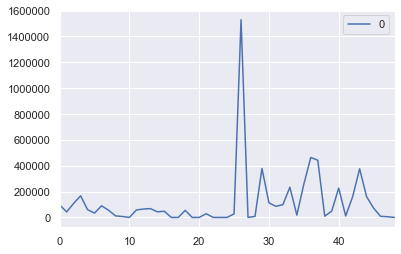

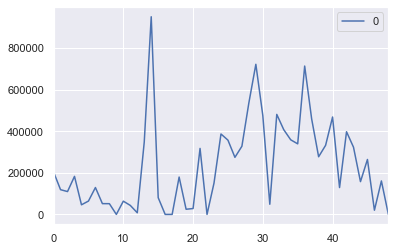

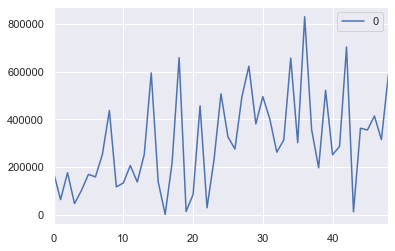

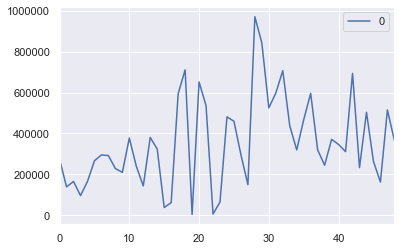

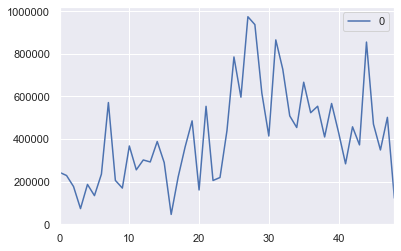

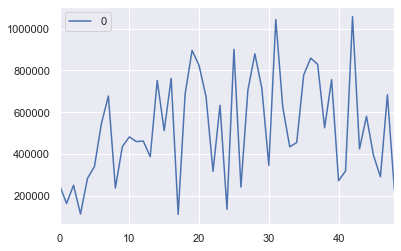

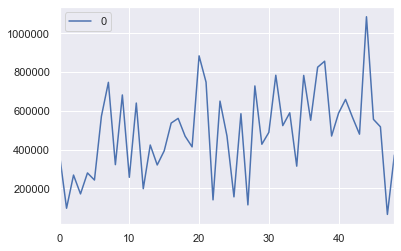

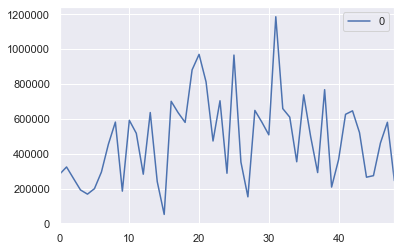

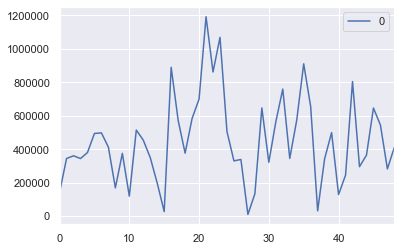

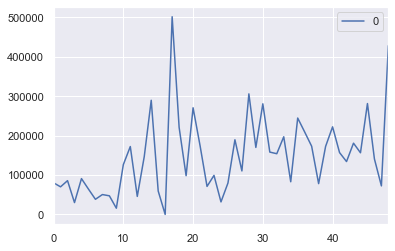

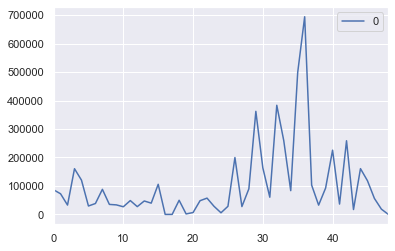

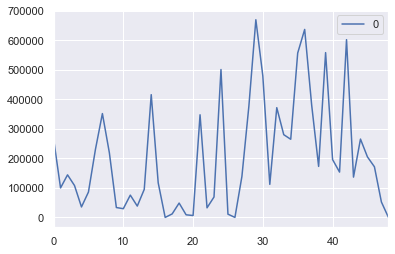

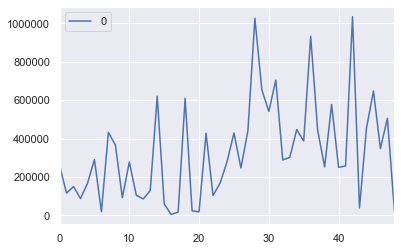

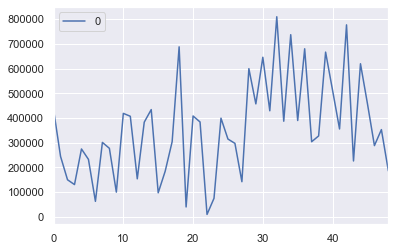

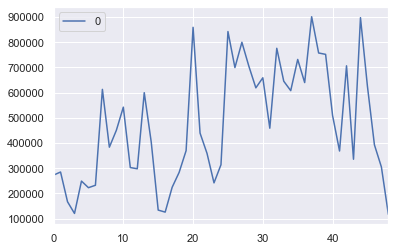

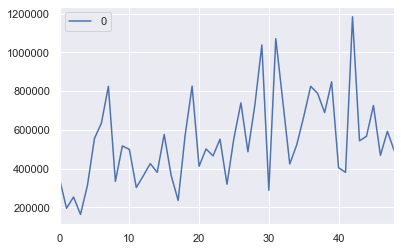

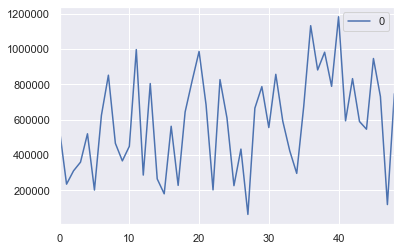

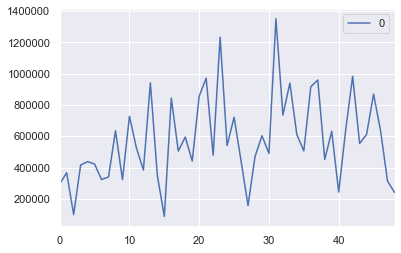

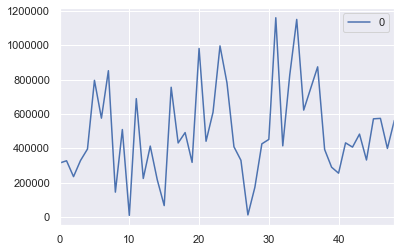

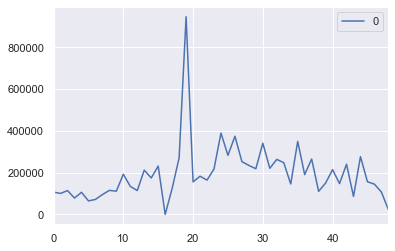

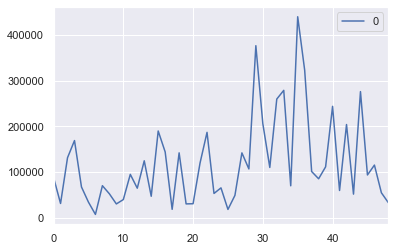

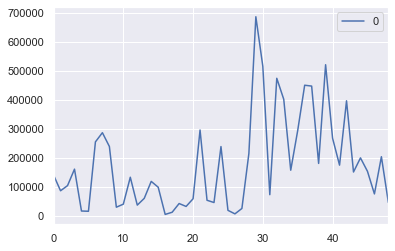

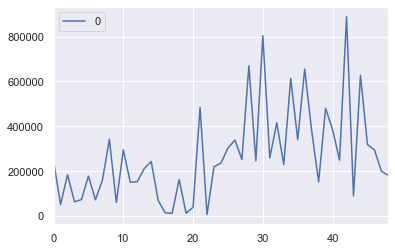

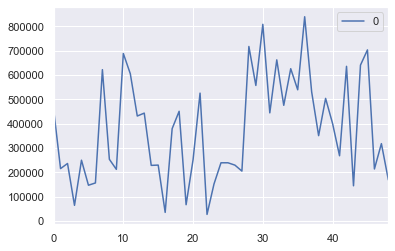

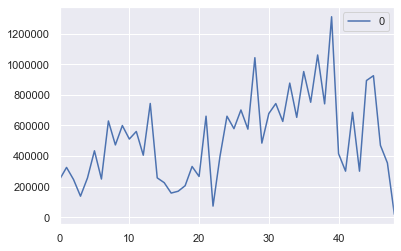

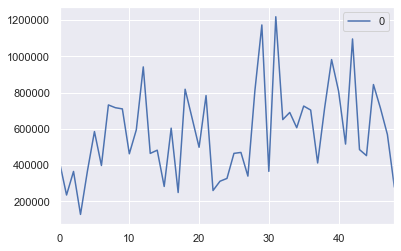

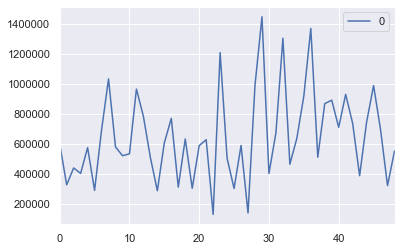

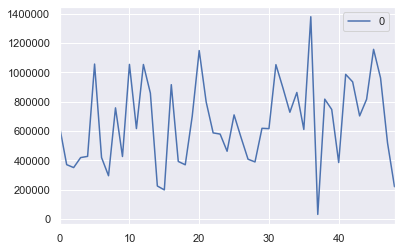

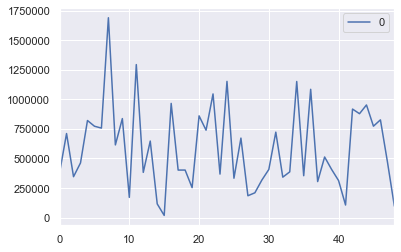

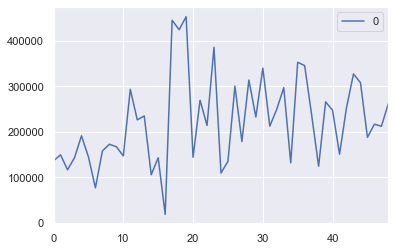

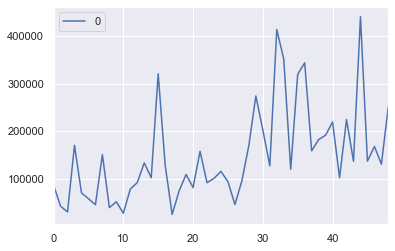

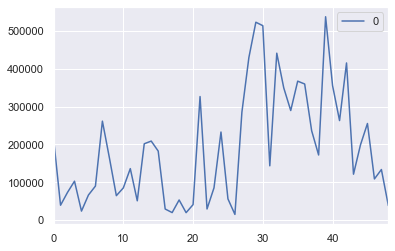

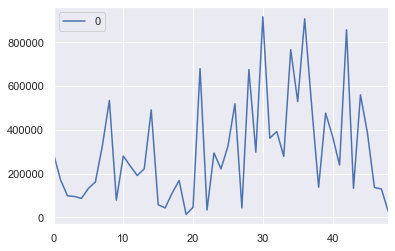

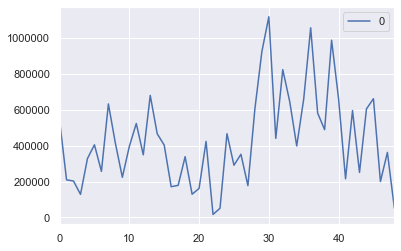

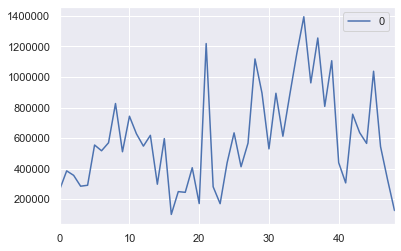

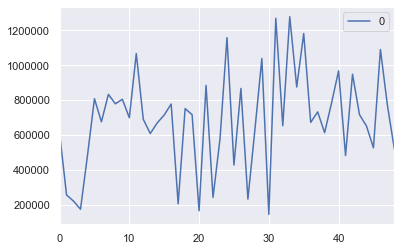

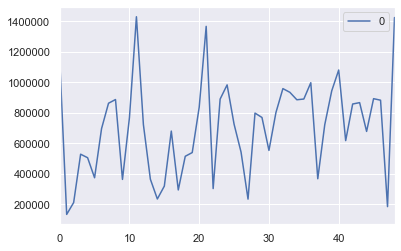

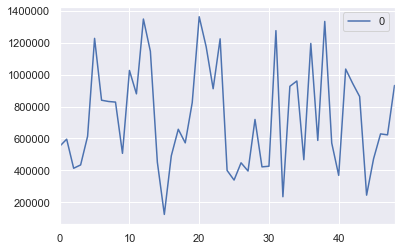

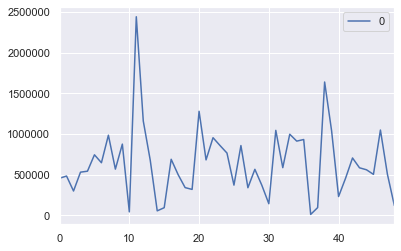

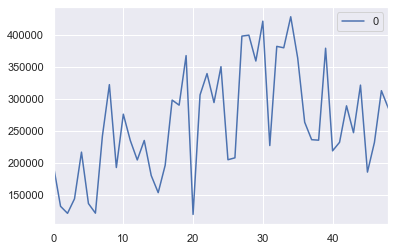

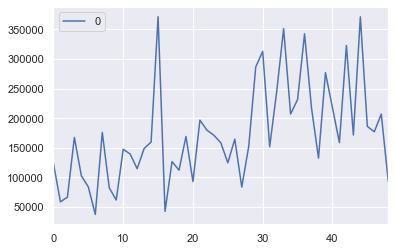

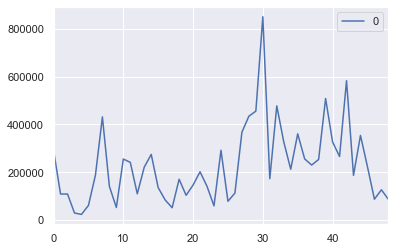

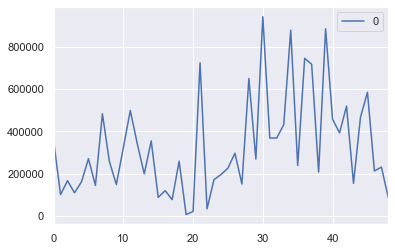

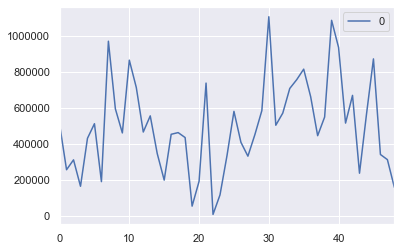

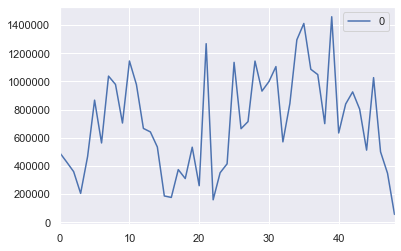

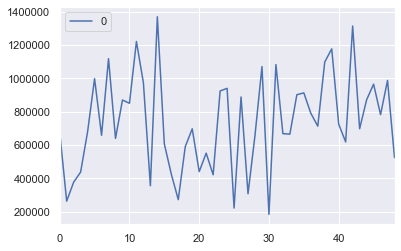

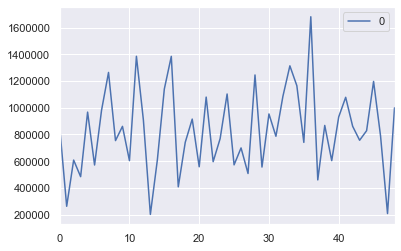

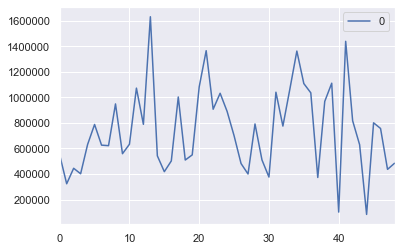

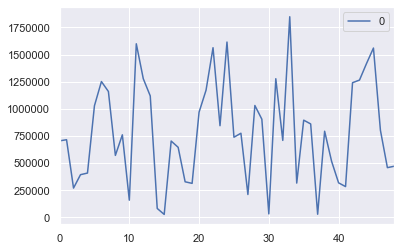

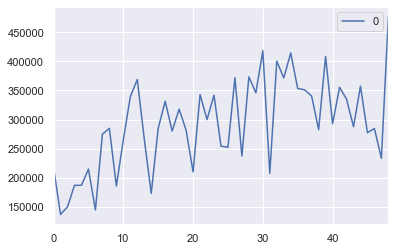

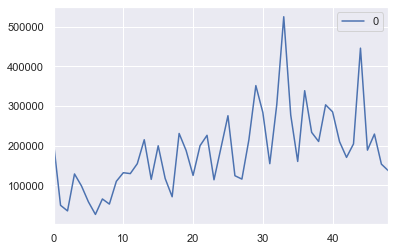

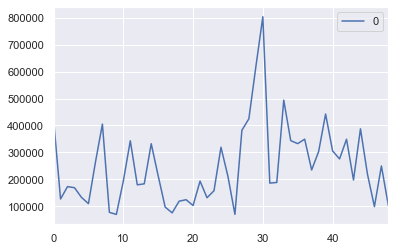

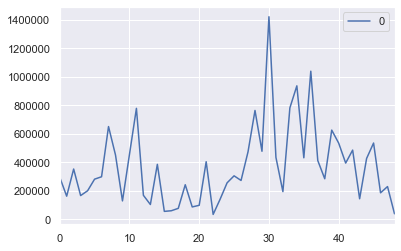

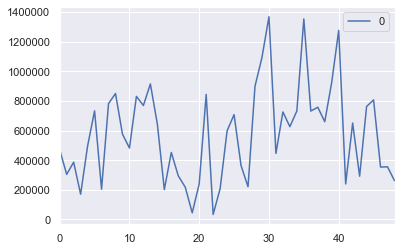

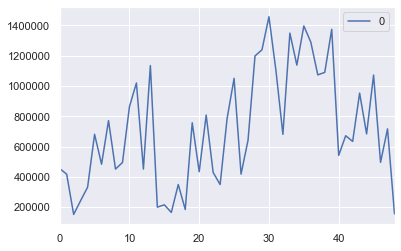

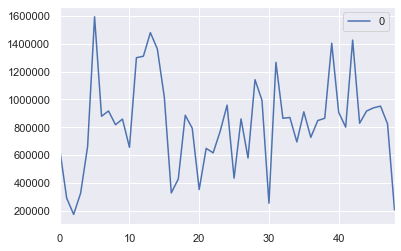

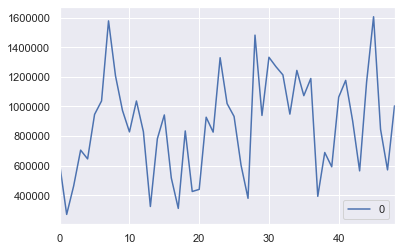

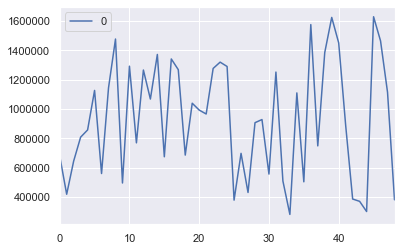

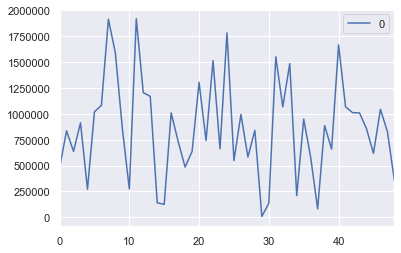

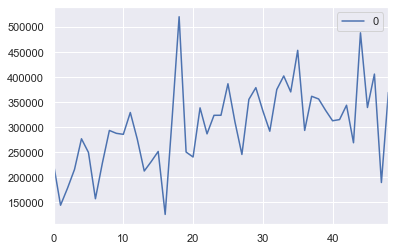

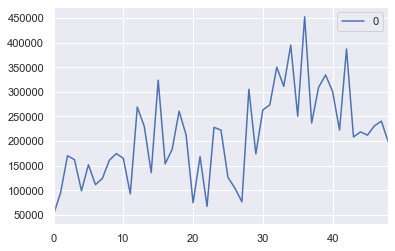

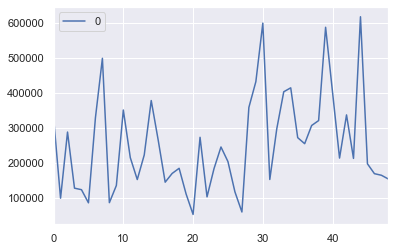

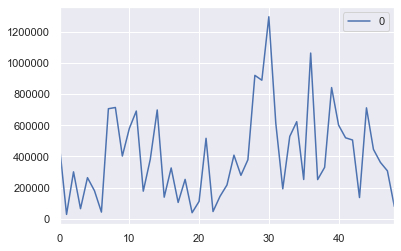

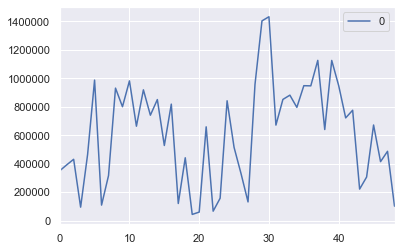

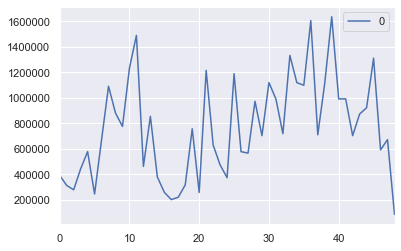

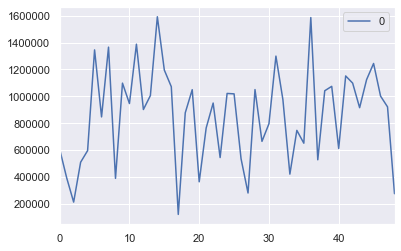

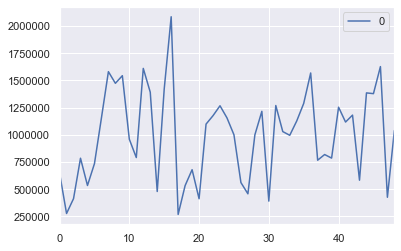

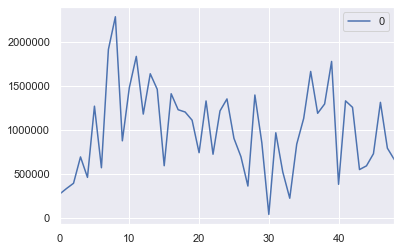

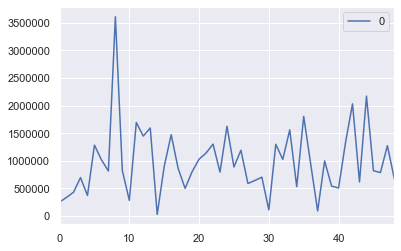

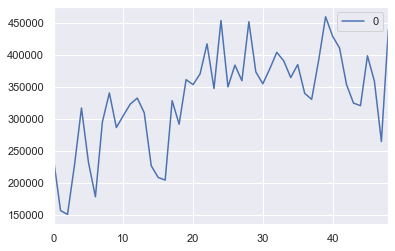

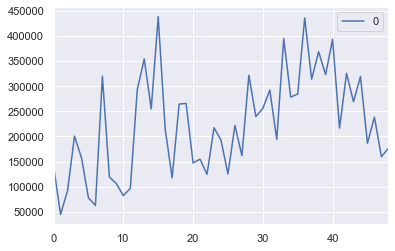

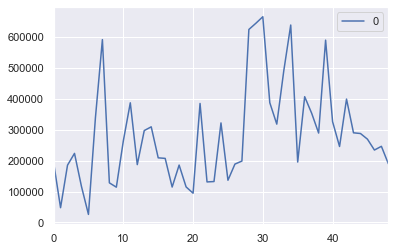

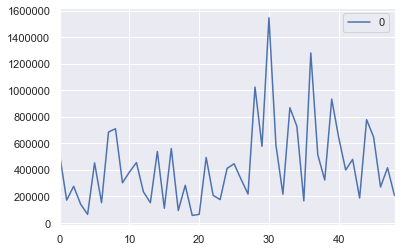

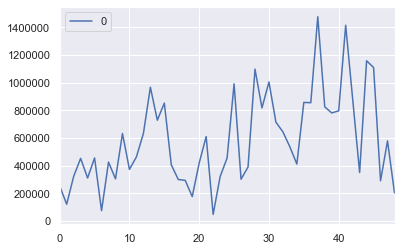

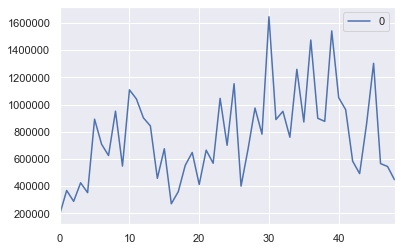

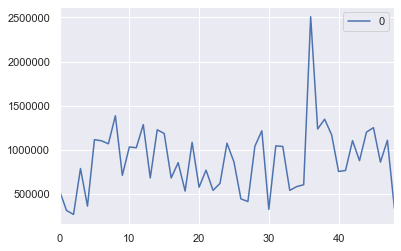

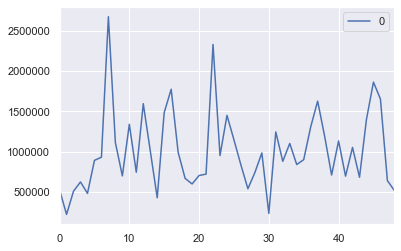

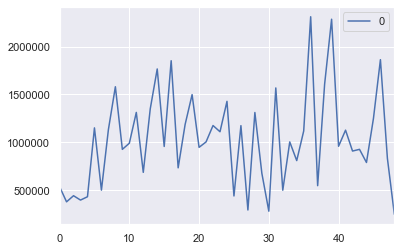

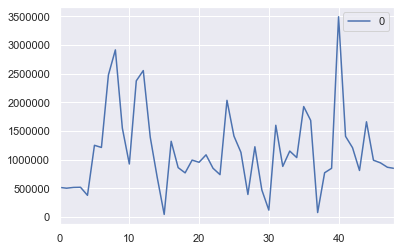

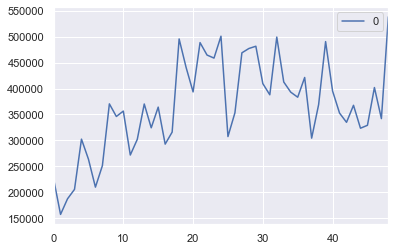

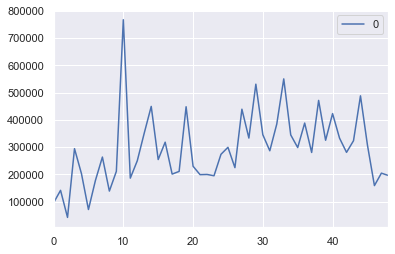

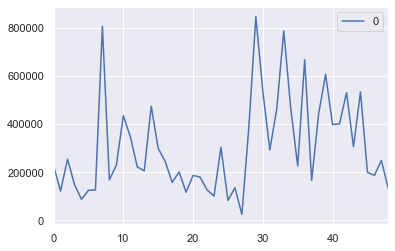

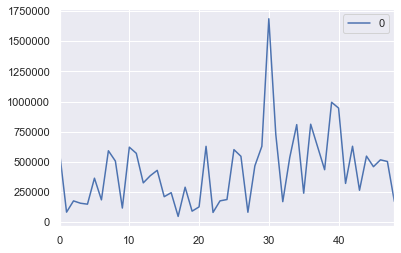

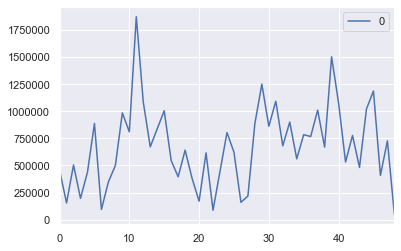

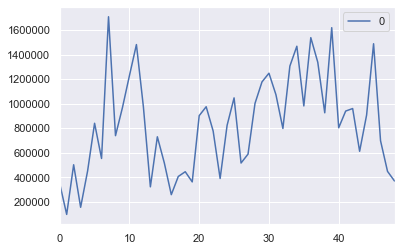

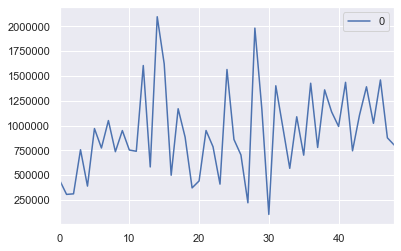

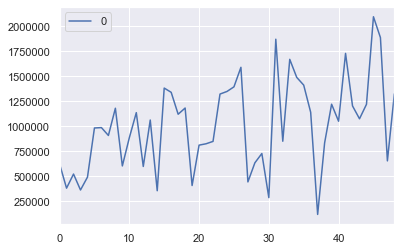

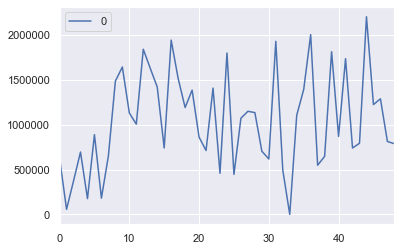

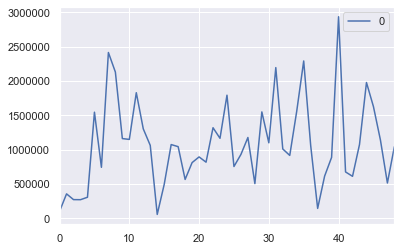

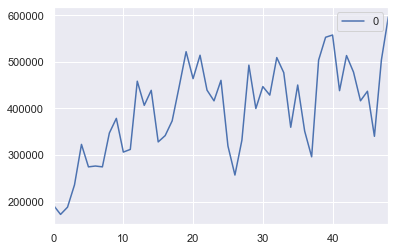

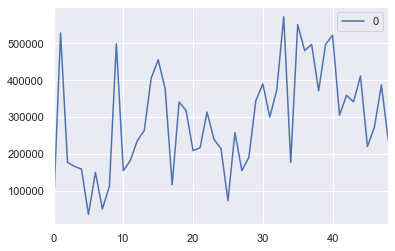

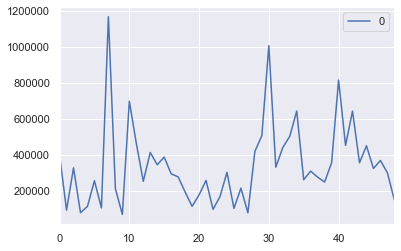

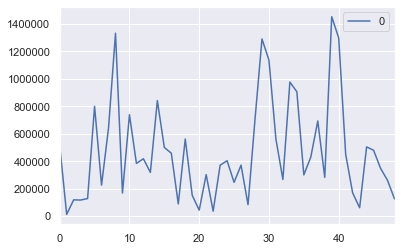

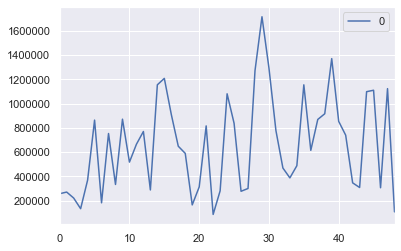

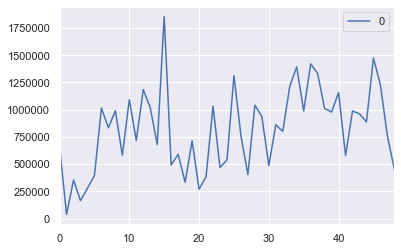

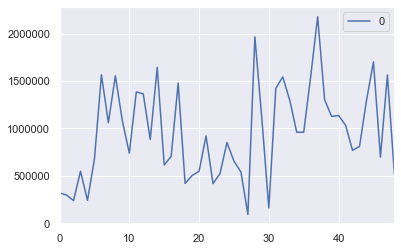

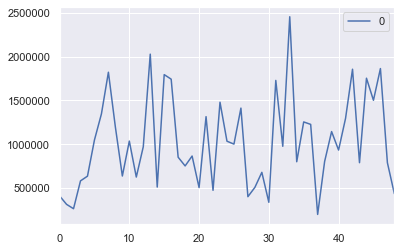

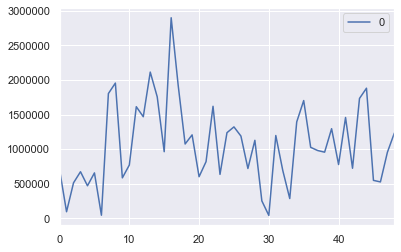

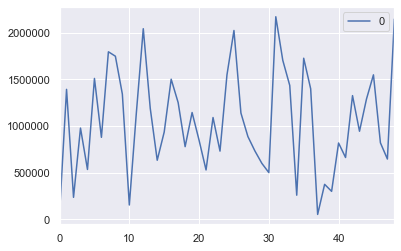

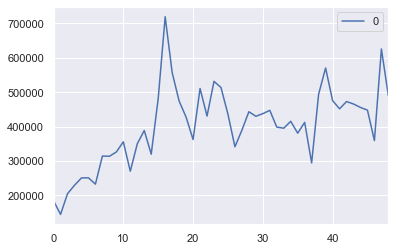

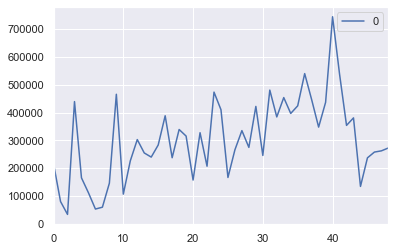

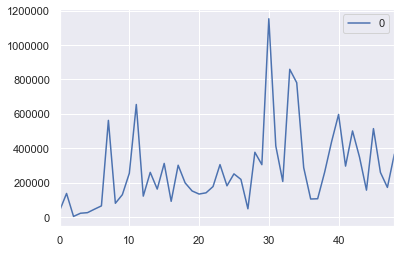

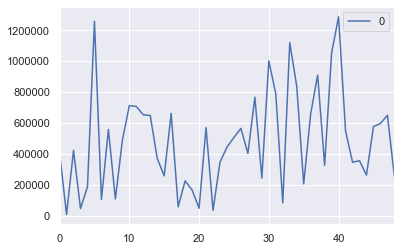

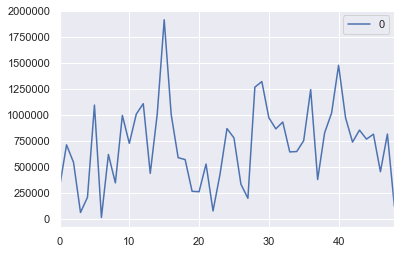

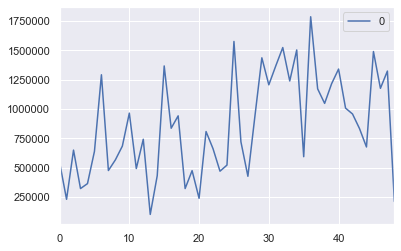

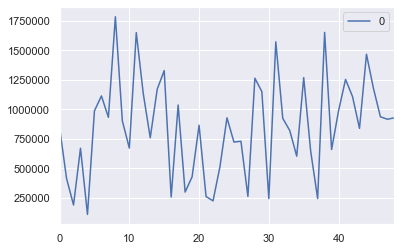

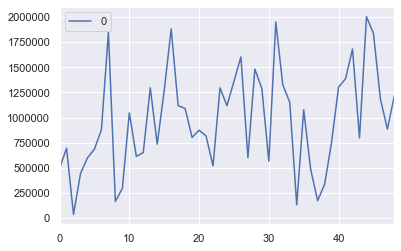

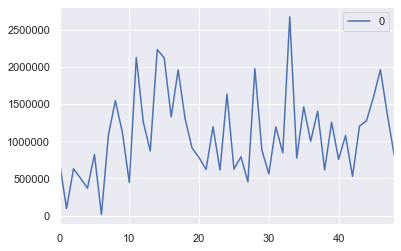

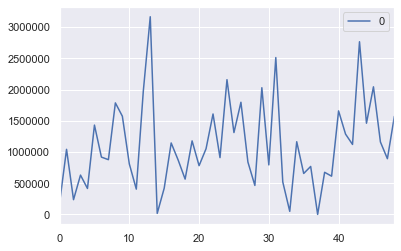

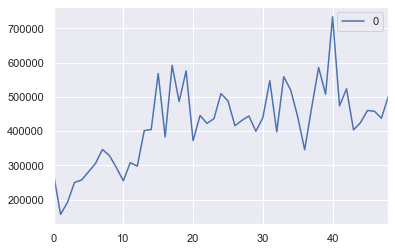

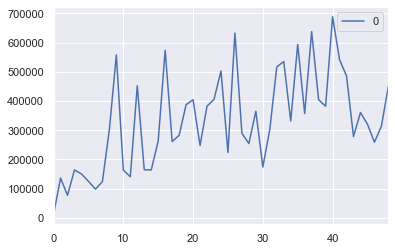

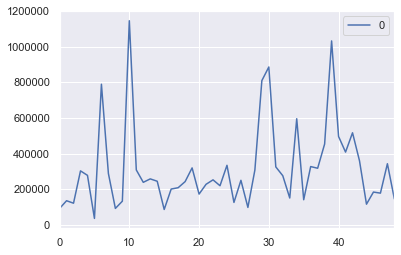

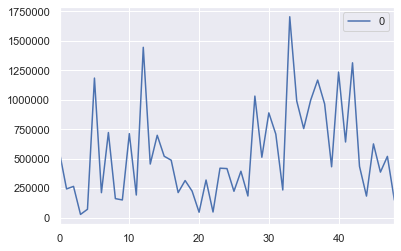

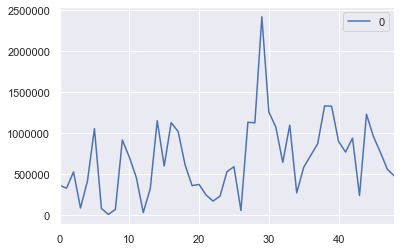

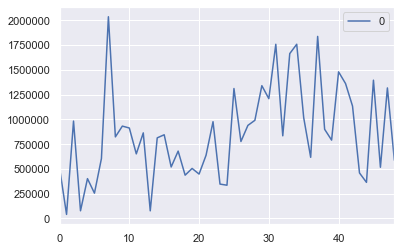

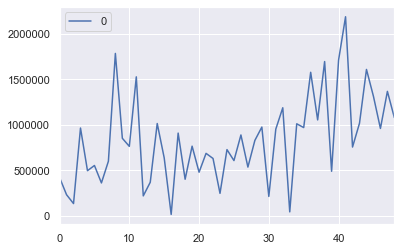

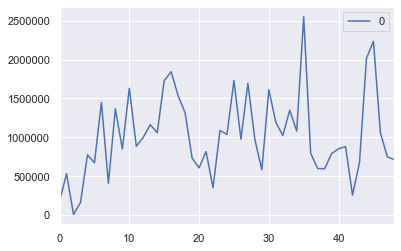

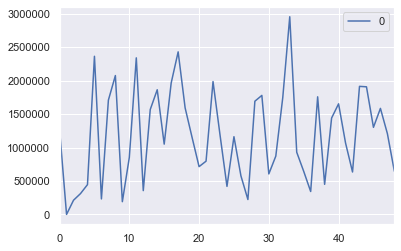

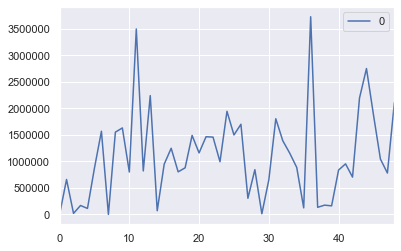

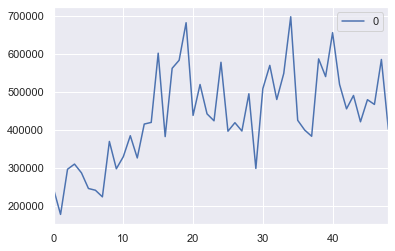

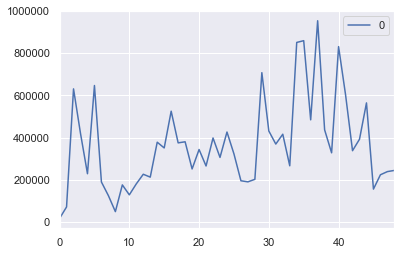

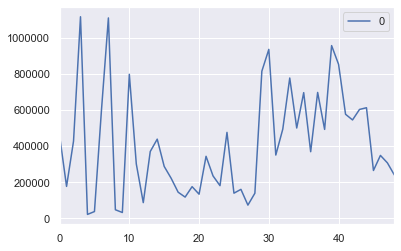

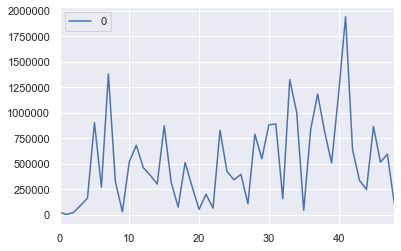

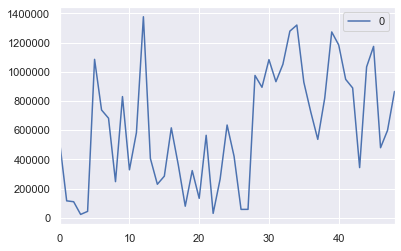

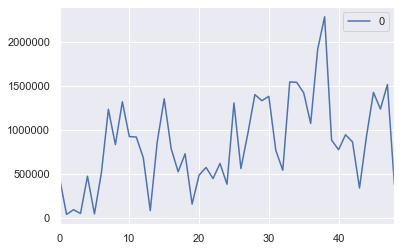

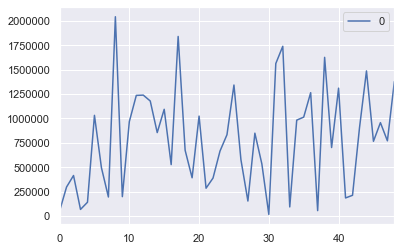

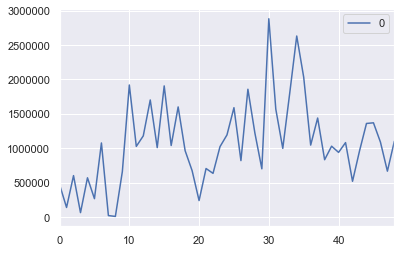

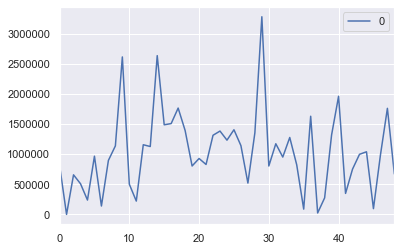

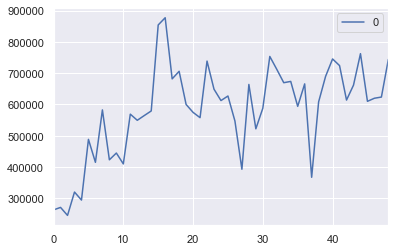

In [194]:
[pd.DataFrame(std_calc(level, sign, lambda_weekly)[0][i]).plot() for i in range(160)];

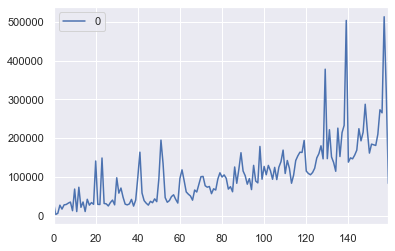

In [216]:
std_A1 = std_calc("A1", sign, lambda_weekly)[1]
pd.DataFrame(std_A1).plot()

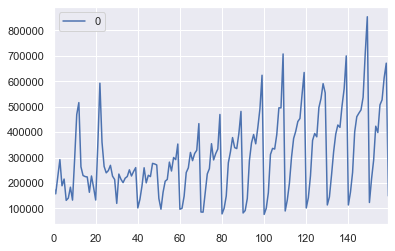

In [215]:
std_B1 = std_calc("B1", sign, lambda_weekly)[1]
pd.DataFrame(std_B1).plot()

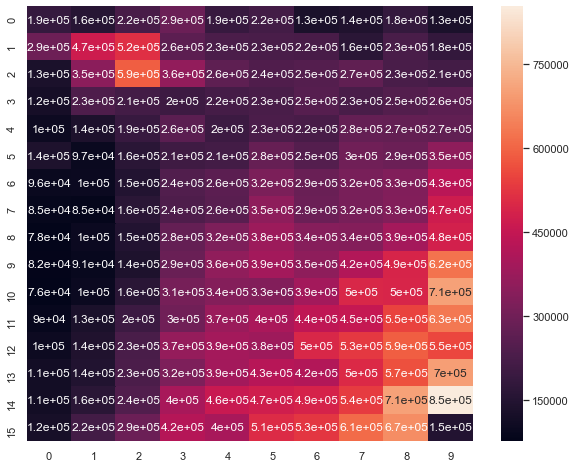

In [218]:
# std dataframe
plt.figure(figsize=(10,8))
std_DF = pd.DataFrame(np.array(std_B1).reshape(16,10))
ax = sns.heatmap(std_DF, annot=True);

In [202]:
flights = sns.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights, annot=True, fmt="d")

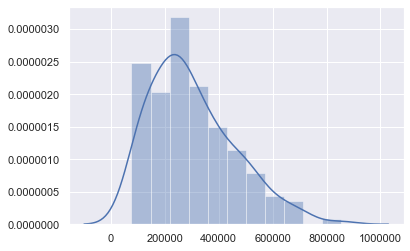

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
std = [np.std(arr) for arr in _arr_]
sns.distplot(std);

In [177]:
std

[187262.44879532332,
 156936.90939396707,
 223515.44496551913,
 291638.56392322865,
 188700.27030617572,
 215194.91209192315,
 131433.4531844389,
 140415.1470618299,
 183170.29606797194,
 132401.4554237408,
 293589.8165836219,
 468795.978815369,
 515964.12439472205,
 263338.3354177913,
 229083.16737325198,
 225032.67466199628,
 223402.7362646727,
 163153.49072025792,
 227302.81342948458,
 182385.861776934,
 132653.60892011644,
 346914.3905036759,
 592287.1318438506,
 360364.0729453733,
 264958.90647654457,
 239648.1882560662,
 248415.11493706531,
 269254.5499874742,
 226740.35491590257,
 213523.855732211,
 119454.69217549494,
 234841.57253565552,
 214448.59680561893,
 201122.85343044443,
 218590.68840972774,
 225243.14080262018,
 251601.66363189532,
 227203.08229011542,
 245077.2315992276,
 260245.82638681776,
 101593.26243219801,
 135262.74761515978,
 188939.0596252987,
 259639.02531992135,
 200126.775575244,
 230061.429101618,
 224908.8767102778,
 276898.4071855877,
 274531.644977914

In [179]:
df["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
30     4.8
31     5.4
32     5.2
33     5.5
34     4.9
35     5.0
36     5.5
37     4.9
38     4.4
39     5.1
40     5.0
41     4.5
42     4.4
43     5.0
44     5.1
45     4.8
46     5.1
47     4.6
48     5.3
49     5.0
      ... 
100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9

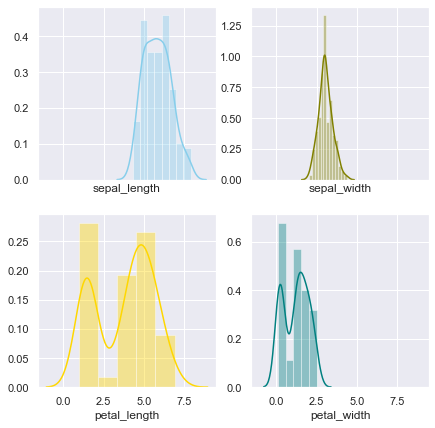

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])
